In [1]:
# For Data Manipulation
import pandas as pd
# numpy gives us access to some useful data structures
import numpy as np
# Seaborn is another visualisation library
import seaborn as sns
# matplotlib allows us to do basic plots
%matplotlib inline
import matplotlib.pyplot as plt

# For Hypothesis testing
from scipy import stats
# Ignore warnings (just for neatness)
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas_datareader as pdr

In [3]:
from pandas_datareader import wb

### All about Nigeria
#### I want to see Nigeria's GDP vs what we're producing, population, employment rates, people leaving the country
#### I want to see Nigeria's GDP share of total GDP
#### Can we see where Nigeria's population is going?

In [4]:
ind = ['NY.GDP.MKTP.CD', 'SP.POP.TOTL','FP.CPI.TOTL','TX.QTY.MRCH.XD.WD','NV.IND.MANF.KD','SL.UEM.TOTL.ZS','SM.POP.NETM']
country = ['NGA']
dat = wb.download(indicator=ind, country=country, start=2010, end=2024).dropna()
dat.columns = ['gdp', 'population','cpi', 'export_vol_index', 'manufacturing','unemployment','net_migration']
dat.head(5)

gdp  population         cpi  export_vol_index  \
country year                                                           
Nigeria 2021  4.408390e+11   213401323  354.296242         60.543389   
        2020  4.321989e+11   208327405  302.939394         86.075569   
        2019  4.745175e+11   203304492  267.505547        108.113169   
        2018  4.217393e+11   198387623  240.138365         92.405139   
        2017  3.757457e+11   193495907  214.227340         86.868245   

              manufacturing  unemployment  net_migration  
country year                                              
Nigeria 2021   4.588934e+10         5.393         -76364  
        2020   4.440258e+10         5.712          -4824  
        2019   4.566050e+10         5.206        -103989  
        2018   4.531298e+10         5.065         -81384  
        2017   4.438356e+10         4.826          15016

In [8]:
#checking for missing values
print(dat.isnull().sum())

gdp                 0
population          0
cpi                 0
export_vol_index    0
manufacturing       0
unemployment        0
net_migration       0
dtype: int64


In [10]:
print(dat[["gdp", "manufacturing"]].describe())

                gdp  manufacturing
count  1.200000e+01   1.200000e+01
mean   4.485371e+11   4.113967e+10
std    6.021402e+10   7.348733e+09
min    3.669904e+11   2.525607e+10
25%    4.120123e+11   3.927952e+10
50%    4.365189e+11   4.444012e+10
75%    4.791448e+11   4.571771e+10
max    5.741838e+11   4.717351e+10


In [12]:
dat.head(15)

gdp  population         cpi  export_vol_index  \
country year                                                           
Nigeria 2021  4.408390e+11   213401323  354.296242         60.543389   
        2020  4.321989e+11   208327405  302.939394         86.075569   
        2019  4.745175e+11   203304492  267.505547        108.113169   
        2018  4.217393e+11   198387623  240.138365         92.405139   
        2017  3.757457e+11   193495907  214.227340         86.868245   
        2016  4.046491e+11   188666931  183.882551         80.809710   
        2015  4.930267e+11   183995785  158.934846        100.000000   
        2014  5.741838e+11   179379016  145.799165        119.359839   
        2013  5.201172e+11   174726123  134.939990         97.807224   
        2012  4.639710e+11   170075932  124.373792        120.709904   
        2011  4.144667e+11   165463745  110.826137        123.115772   
        2010  3.669904e+11   160952853  100.000000        119.331344   

              manufacturing  unemployment  net_migration  
country year                                              
Nigeria 2021   4.588934e+10         5.393         -76364  
        2020   4.440258e+10         5.712          -4824  
        2019   4.566050e+10         5.206        -103989  
        2018   4.531298e+10         5.065         -81384  
        2017   4.438356e+10         4.826          15016  
        2016   4.447767e+10         4.498         -54315  
        2015   4.648471e+10         4.137        -145917  
        2014   4.717351e+10         3.903         -49351  
        2013   4.111922e+10         3.711          10588  
        2012   3.376042e+10         3.760          41741  
        2011   2.975555e+10         3.770          38226  
        2010   2.525607e+10         3.739          18073

In [11]:
print(dat.dtypes)

gdp                 float64
population            int64
cpi                 float64
export_vol_index    float64
manufacturing       float64
unemployment        float64
net_migration         int64
dtype: object


In [13]:
print(dat.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 12 entries, ('Nigeria', '2021') to ('Nigeria', '2010')
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gdp               12 non-null     float64
 1   population        12 non-null     int64  
 2   cpi               12 non-null     float64
 3   export_vol_index  12 non-null     float64
 4   manufacturing     12 non-null     float64
 5   unemployment      12 non-null     float64
 6   net_migration     12 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 1.6+ KB
None


In [30]:
dat = dat.sort_values(by='year', ascending=True)

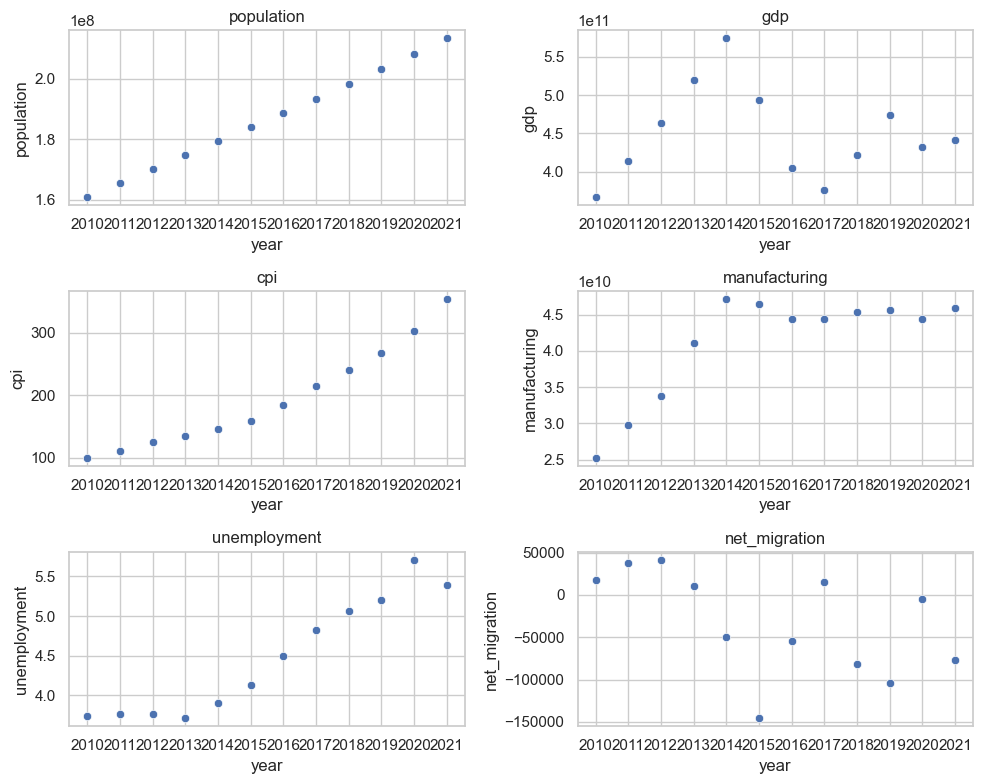

In [31]:
sns.set_theme(style="whitegrid") #setting the style 
f, ax = plt.subplots(3, 2, figsize=(10, 8)) #creating a figure with 6 (3X2) subplots

#first row, first column
sns.scatterplot(data=dat, x="year", y="population", ax=ax[0,0])
ax[0,0].set_title('population')

#first row, second column
sns.scatterplot(data=dat, x="year", y="gdp", ax=ax[0,1])
ax[0,1].set_title('gdp')

#second row, first column
sns.scatterplot(data=dat, x="year", y="cpi",  ax=ax[1,0])
ax[1,0].set_title('cpi')

#second row, second column
sns.scatterplot(data=dat, x="year", y="manufacturing",  ax=ax[1,1])
ax[1,1].set_title('manufacturing')

#third row, first column
sns.scatterplot(data=dat, x="year", y="unemployment", ax=ax[2,0])
ax[2,0].set_title('unemployment')

#third row, second column
sns.scatterplot(data=dat, x="year", y="net_migration", ax=ax[2,1])
ax[2,1].set_title('net_migration')

plt.tight_layout()
plt.show()

##### 2014 is the start of the decline, manufacturing stalls, GDP drops, unemployment and cpi rise. net migration starts dropping a year before
##### Is net migration the start of the problem, so really, more people are emigrating (talent leaving) than are coming in and this results in a problem?
##### Or is the first place to look at manufacturing. This is what has stalled despite the growing population

#### I think, lets start with why people are emigrating

In [23]:
%pip install numpy==1.23.4
%pip install sweetviz

  Using cached numpy-1.23.4-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
You should consider upgrading via the '/Users/angelita.damola/Angelita_github/exploration-journey/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
  Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 KB 1.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/angelita.damola/Angelita_github/exploration-journey/.venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [24]:
import sweetviz as sv

In [25]:
sv_ng_dat = sv.analyze(dat)
sv_ng_dat.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


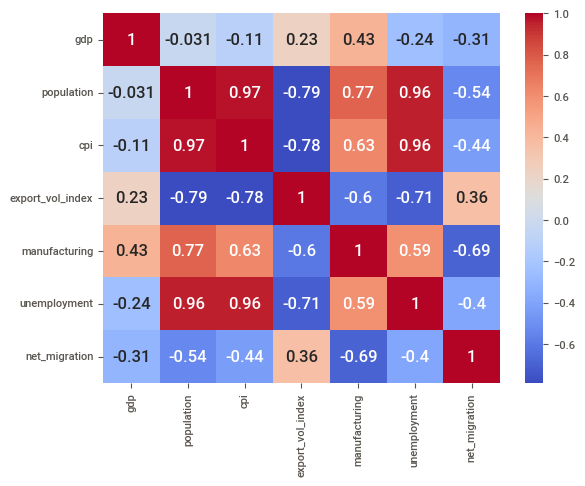

In [28]:
correlation_matrix = dat.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()